Introduction (What we want to do and what data we are looking at):
A novel corona virus (COVID 19) was identified in 2019 in Wuhan China. It has spread rapidly worldwide and was officially declared to be a pandemic by the WHO. To better understand the data available about it, we will be doing exploratory data analysis of the available COVID 19 data. The goal of the project is to study the impact of COVID 19 across the world using Python, Pandas and Matplotlib and present visualizations to show our analysis.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from datetime import datetime, timedelta
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = "notebook_connected"
init_notebook_mode(connected=True)
# End Dependencies and Setup



In [80]:
# Loading the data
file = "Data/owid-covid-data.csv"

# Reading the data into a pandas dataframe
data = pd.read_csv(file)

In [81]:
# Get all the columns in the dataframe to look for the data needed
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [82]:
# Change the date format to datetime
#data['date'] = pd.to_datetime(data['date'],errors='ignore')

Top 10 countries by cases - Victoria

In [83]:
#Victoria
data["date"] = pd.to_datetime(data["date"])

In [84]:
#CODE FROM MAIN COVIDPY.ipynb FILE; CHANGED DF

# number of countries
count_countries = data['location'].nunique()

# number of continents
count_continents = data['continent'].nunique()

print("This research includes data from ", count_countries, "countries from", count_continents, "continents.")


This research includes data from  243 countries from 6 continents.


In [85]:
begin_date = data['date'].min()

through_date = data['date'].max()

print("The date ranges for this dataset are ", begin_date, "through ", through_date)

The date ranges for this dataset are  2020-01-01 00:00:00 through  2022-04-24 00:00:00


In [86]:
covid_data_2022_03_31 = data.loc[(data["date"] == "2022-03-31")]


covid_data_continents_2022_03_31 = covid_data_2022_03_31.loc[(covid_data_2022_03_31["continent"] == "Asia") | 
                                            (covid_data_2022_03_31["continent"] == "Europe") | 
                                            (covid_data_2022_03_31["continent"] == "Africa") | 
                                            (covid_data_2022_03_31["continent"] == "North America") | 
                                            (covid_data_2022_03_31["continent"] == "South America") | 
                                            (covid_data_2022_03_31["continent"] == "Oceania")]


top_10_by_cases = covid_data_continents_2022_03_31.nlargest(10, 'total_cases')


print("The 10 countries with the highest reported number of COVID-19 cases as of March 31st, 2022 are: ", top_10_by_cases["location"].tolist() )


The 10 countries with the highest reported number of COVID-19 cases as of March 31st, 2022 are:  ['United States', 'India', 'Brazil', 'France', 'Germany', 'United Kingdom', 'Russia', 'Turkey', 'Italy', 'South Korea']


In [87]:
top_10_by_cases[["location", "total_cases"]]

,location,total_cases
171748,United States,80109345.0
76007,India,43025775.0
23518,Brazil,29951670.0
58331,France,25668176.0
62253,Germany,21357095.0
170924,United Kingdom,21216038.0
135589,Russia,17583111.0
166270,Turkey,14860560.0
82348,Italy,14642354.0
152449,South Korea,13375818.0


Text(0.5, 1.0, 'Top 10 Countries by COVID-19 Cases (effective 03.31.2022)')

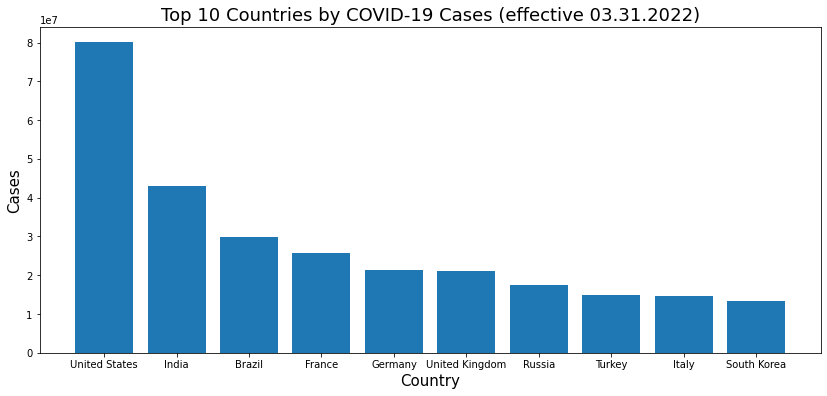

In [88]:
plt.figure(figsize=(14,6))
plt.bar("location", "total_cases", data=top_10_by_cases)
plt.xlabel("Country", size=15)
plt.ylabel("Cases", size=15)
#plt.ylim( [ 0, 100000000 ] )  
plt.title("Top 10 Countries by COVID-19 Cases (effective 03.31.2022)", size=18)
#plt.savefig("bar_plot_matplotlib_Python.png")

In [89]:
fig = px.bar(top_10_by_cases, x='location', y='total_cases', 
            color='location',
            title='Top 10 Countries by COVID-19 Cases (effective 03.31.2022)',
            labels={"location": "Country",
                    "total_cases": "Total Cases"})

fig.show()

In [90]:

covid_data_continents_all_dates = data.loc[(data["continent"] == "Asia") | 
                                            (data["continent"] == "Europe") | 
                                            (data["continent"] == "Africa") | 
                                            (data["continent"] == "North America") | 
                                            (data["continent"] == "South America") | 
                                            (data["continent"] == "Oceania")]


covid_data_grouped = covid_data_continents_all_dates.groupby(["location"]).sum().reset_index()


print("The 10 countries with the highest reported number of COVID-19 related hospital admissions are: ")


weekly_hosp_admissions = covid_data_grouped[["location", "weekly_hosp_admissions"]]
weekly_hosp_admissions.sort_values(by = ["weekly_hosp_admissions"], ascending=False).head(10)

The 10 countries with the highest reported number of COVID-19 related hospital admissions are: 


,location,weekly_hosp_admissions
217,United States,33598740.0
216,United Kingdom,5719344.0
70,France,5549783.0
192,Spain,4093740.0
99,Italy,4051843.0
75,Germany,3659914.0
122,Malaysia,3656750.0
52,Czechia,1512777.0
40,Chile,1371325.0
190,South Korea,1214614.0


In [91]:
print("The 10 countries with the highest reported number of COVID-19 related ICU admissions are: ")

weekly_icu_admissions = covid_data_grouped[["location", "weekly_icu_admissions"]]
weekly_icu_admissions.sort_values(by = ["weekly_icu_admissions"], ascending=False).head(10)

The 10 countries with the highest reported number of COVID-19 related ICU admissions are: 


,location,weekly_icu_admissions
70,France,929982.0
192,Spain,445426.0
40,Chile,379029.0
75,Germany,339919.0
99,Italy,316873.0
52,Czechia,141407.0
142,Netherlands,93710.0
98,Israel,41685.0
78,Greece,14696.0
190,South Korea,13686.0


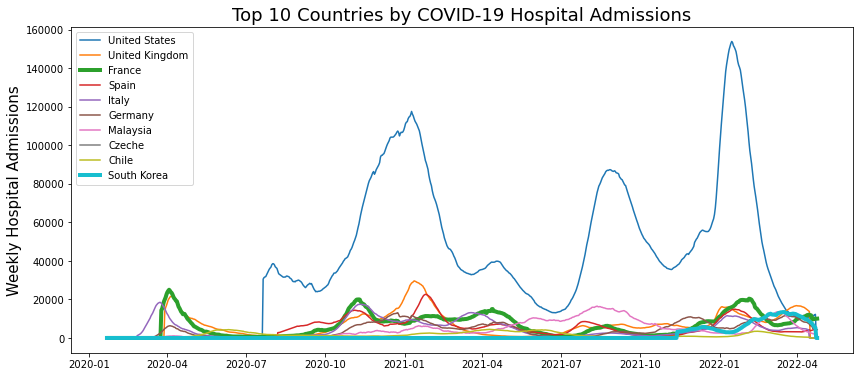

In [92]:
covid_data_location_date = covid_data_continents_all_dates.groupby(["location", "date"]).sum().reset_index()


covid_data_top10_weekly_hosp_admissions = covid_data_location_date.loc[
                                            (covid_data_location_date["location"] == "United States") |
                                            (covid_data_location_date["location"] == "United Kingdom") | 
                                            (covid_data_location_date["location"] == "France") | 
                                            (covid_data_location_date["location"] == "Spain") | 
                                            (covid_data_location_date["location"] == "Italy") |
                                            (covid_data_location_date["location"] == "Germany") |
                                            (covid_data_location_date["location"] == "Malaysia") |
                                            (covid_data_location_date["location"] == "Czeche") |
                                            (covid_data_location_date["location"] == "Chile") | 
                                            (covid_data_location_date["location"] == "South Korea")]


covid_data_weekly_hosp_admissions_US = covid_data_location_date.loc[(covid_data_location_date["location"] == "United States")]
covid_data_weekly_hosp_admissions_UK = covid_data_location_date.loc[(covid_data_location_date["location"] == "United Kingdom")]
covid_data_weekly_hosp_admissions_France = covid_data_location_date.loc[(covid_data_location_date["location"] == "France")]
covid_data_weekly_hosp_admissions_Spain = covid_data_location_date.loc[(covid_data_location_date["location"] == "Spain")]
covid_data_weekly_hosp_admissions_Italy = covid_data_location_date.loc[(covid_data_location_date["location"] == "Italy")]
covid_data_weekly_hosp_admissions_Germany = covid_data_location_date.loc[(covid_data_location_date["location"] == "Germany")]
covid_data_weekly_hosp_admissions_Malaysia = covid_data_location_date.loc[(covid_data_location_date["location"] == "Malaysia")]
covid_data_weekly_hosp_admissions_Czeche = covid_data_location_date.loc[(covid_data_location_date["location"] == "Czeche")]
covid_data_weekly_hosp_admissions_Chile = covid_data_location_date.loc[(covid_data_location_date["location"] == "Chile")]
covid_data_weekly_hosp_admissions_South_Korea = covid_data_location_date.loc[(covid_data_location_date["location"] == "South Korea")]


plt.figure(figsize=(14,6))
plt.plot(covid_data_weekly_hosp_admissions_US["date"], covid_data_weekly_hosp_admissions_US["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_UK["date"], covid_data_weekly_hosp_admissions_UK["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_France["date"], covid_data_weekly_hosp_admissions_France["weekly_hosp_admissions"], linewidth = 4)
plt.plot(covid_data_weekly_hosp_admissions_Spain["date"], covid_data_weekly_hosp_admissions_Spain["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_Italy["date"], covid_data_weekly_hosp_admissions_Italy["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_Germany["date"], covid_data_weekly_hosp_admissions_Germany["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_Malaysia["date"], covid_data_weekly_hosp_admissions_Malaysia["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_Czeche["date"], covid_data_weekly_hosp_admissions_Czeche["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_Chile["date"], covid_data_weekly_hosp_admissions_Chile["weekly_hosp_admissions"])
plt.plot(covid_data_weekly_hosp_admissions_South_Korea["date"], covid_data_weekly_hosp_admissions_South_Korea["weekly_hosp_admissions"], linewidth = 4)
plt.xlabel("", size=15)
plt.ylabel("Weekly Hospital Admissions", size=15)
#plt.ylim( [ 0, 100000000 ] )  
plt.title("Top 10 Countries by COVID-19 Hospital Admissions", size=18)
plt.legend(["United States", "United Kingdom", "France", "Spain", "Italy", "Germany", "Malaysia", "Czeche", "Chile", "South Korea"])
#plt.savefig("bar_plot_matplotlib_Python.png")
plt.show()

In [93]:
fig = px.line(covid_data_top10_weekly_hosp_admissions, x='date',y='weekly_hosp_admissions', 
                color='location',
                title='Top 10 Countries by COVID-19 Hospital Admissions',
                labels={"date": "",
                    "weekly_hosp_admissions": "Weekly Hospital Admissions",
                    "location": "Country"})
fig.show()

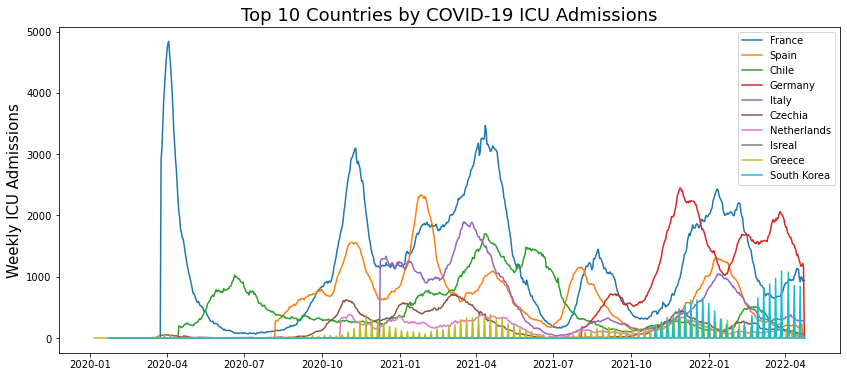

In [94]:
covid_data_top10_weekly_icu_admissions = covid_data_location_date.loc[
                                            (covid_data_location_date["location"] == "France") | 
                                            (covid_data_location_date["location"] == "Spain") |
                                            (covid_data_location_date["location"] == "Chile") | 
                                            (covid_data_location_date["location"] == "Germany") |
                                            (covid_data_location_date["location"] == "Italy") |
                                            (covid_data_location_date["location"] == "Czechia") |
                                            (covid_data_location_date["location"] == "Netherlands") |
                                            (covid_data_location_date["location"] == "Isreal") |
                                            (covid_data_location_date["location"] == "Greece") |
                                            (covid_data_location_date["location"] == "South Korea")]

covid_data_weekly_icu_admissions_France = covid_data_location_date.loc[(covid_data_location_date["location"] == "France")]
covid_data_weekly_icu_admissions_Spain = covid_data_location_date.loc[(covid_data_location_date["location"] == "Spain")]
covid_data_weekly_icu_admissions_Chile = covid_data_location_date.loc[(covid_data_location_date["location"] == "Chile")]
covid_data_weekly_icu_admissions_Germany = covid_data_location_date.loc[(covid_data_location_date["location"] == "Germany")]
covid_data_weekly_icu_admissions_Italy = covid_data_location_date.loc[(covid_data_location_date["location"] == "Italy")]
covid_data_weekly_icu_admissions_Czechia = covid_data_location_date.loc[(covid_data_location_date["location"] == "Czechia")]
covid_data_weekly_icu_admissions_Netherlands = covid_data_location_date.loc[(covid_data_location_date["location"] == "Netherlands")]
covid_data_weekly_icu_admissions_Isreal = covid_data_location_date.loc[(covid_data_location_date["location"] == "Isreal")]
covid_data_weekly_icu_admissions_Greece = covid_data_location_date.loc[(covid_data_location_date["location"] == "Greece")]
covid_data_weekly_icu_admissions_South_Korea = covid_data_location_date.loc[(covid_data_location_date["location"] == "South Korea")]


plt.figure(figsize=(14,6))
plt.plot(covid_data_weekly_icu_admissions_France["date"], covid_data_weekly_icu_admissions_France["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Spain["date"], covid_data_weekly_icu_admissions_Spain["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Chile["date"], covid_data_weekly_icu_admissions_Chile["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Germany["date"], covid_data_weekly_icu_admissions_Germany["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Italy["date"], covid_data_weekly_icu_admissions_Italy["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Czechia["date"], covid_data_weekly_icu_admissions_Czechia["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Netherlands["date"], covid_data_weekly_icu_admissions_Netherlands["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Isreal["date"], covid_data_weekly_icu_admissions_Isreal["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_Greece["date"], covid_data_weekly_icu_admissions_Greece["weekly_icu_admissions"])
plt.plot(covid_data_weekly_icu_admissions_South_Korea["date"], covid_data_weekly_icu_admissions_South_Korea["weekly_icu_admissions"])
plt.xlabel("", size=15)
plt.ylabel("Weekly ICU Admissions", size=15)
#plt.ylim( [ 0, 100000000 ] )  
plt.title("Top 10 Countries by COVID-19 ICU Admissions", size=18)
plt.legend(["France", "Spain", "Chile", "Germany", "Italy", "Czechia", "Netherlands", "Isreal", "Greece", "South Korea"])
#plt.savefig("bar_plot_matplotlib_Python.png")
plt.show()

In [95]:
fig = px.line(covid_data_top10_weekly_icu_admissions, x='date',y='weekly_icu_admissions', 
                color='location',
                title='Top 10 Countries by COVID-19 ICU Admissions',
                labels={"date": "",
                    "weekly_ICU_admissions": "Weekly ICU Admissions",
                    "location": "Country"})
fig.show()

Top 10 countries by hospitalization rate - Victoria

# Trend of Covid related total deaths by country - Vasanta

In [96]:
# Create a new dataframe with only the columns we want
covid_df = data[['iso_code','continent','location','date','people_fully_vaccinated','people_fully_vaccinated_per_hundred','total_deaths', 'new_deaths']]
covid_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,NaN,NaN,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


## Clean the data

In [97]:
# Drop the rows from continents rows with no data
covid_df_continent_clean = covid_df.dropna(subset=['continent'])
covid_df_continent_clean

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,NaN,NaN,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


### Cleaned data in clean covid dataframe

In [98]:
# Fill the missing values in the columns with 0
clean_covid_df = covid_df_continent_clean.fillna(value=0)
clean_covid_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,0.0,0.00,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,0.0,0.00,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,0.0,0.00,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,0.0,0.00,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
181458,ZWE,Africa,Zimbabwe,2022-04-20,0.0,0.00,5466.0,2.0
181459,ZWE,Africa,Zimbabwe,2022-04-21,3624003.0,24.01,5467.0,1.0
181460,ZWE,Africa,Zimbabwe,2022-04-22,3630122.0,24.05,5468.0,1.0
181461,ZWE,Africa,Zimbabwe,2022-04-23,3636597.0,24.10,5468.0,0.0


In [99]:
# Add a column for the max of total deaths to clean covid dataframe as it is cumulative
clean_covid_df['max_total_deaths'] = clean_covid_df.groupby('location')['total_deaths'].transform('max')
sorted_max_10deaths_df = clean_covid_df.sort_values(by='max_total_deaths', ascending=False).drop_duplicates(subset='max_total_deaths').nlargest(10, 'max_total_deaths')
sorted_max_50deaths_df = clean_covid_df.sort_values(by='max_total_deaths', ascending=False).drop_duplicates(subset='max_total_deaths').nlargest(50, 'max_total_deaths')
#sorted_max_deaths_df.reset_index(inplace=True)
#sorted_max_deaths_df1
sorted_max_10deaths_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths
171362,USA,North America,United States,2021-03-10,39781670.0,11.98,527025.0,1540.0,991254.0
23320,BRA,South America,Brazil,2021-09-14,75814267.0,35.43,588078.0,678.0,662891.0
75228,IND,Asia,India,2020-02-11,0.0,0.00,0.0,0.0,522223.0
134818,RUS,Europe,Russia,2020-02-19,0.0,0.00,0.0,0.0,367366.0
106282,MEX,North America,Mexico,2021-07-25,23955609.0,18.39,238424.0,108.0,324129.0
129721,PER,South America,Peru,2021-08-15,7239915.0,21.70,197393.0,53.0,212742.0
170208,GBR,Europe,United Kingdom,2020-04-14,0.0,0.00,14128.0,1077.0,173518.0
81635,ITA,Europe,Italy,2020-04-17,0.0,0.00,22745.0,575.0,162688.0
76566,IDN,Asia,Indonesia,2021-08-18,29403345.0,10.64,121141.0,1128.0,156100.0
57731,FRA,Europe,France,2020-08-08,0.0,0.00,30329.0,1.0,145129.0


In [100]:
#scatter plot of Top 50 countries with the highest number of deaths till that date
fig = px.scatter(sorted_max_50deaths_df, x='date',y='max_total_deaths', color='location',title='Total Deaths')
fig.show()

In [101]:
#scatter plot of Top 50 countries with the highest number of deaths
fig = px.scatter(sorted_max_50deaths_df, x='location',y='max_total_deaths', color='location',title='Top 50 countries with the highest number of deaths')
fig.show()

In [102]:
# pie chart showing a closer look of the top 10 countries with the highest number of deaths  
fig = px.pie(sorted_max_10deaths_df, values='max_total_deaths', names='location',labels='location', title='Top 10 Countries with the Most Deaths',opacity=0.9)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Progress of fully vaccinated people by country -Vasanta

In [103]:
# Top 10 fully vaccinated countries
sorted_max_10vaccinated_df = clean_covid_df.sort_values(by='people_fully_vaccinated', ascending=False).drop_duplicates(subset='location').nlargest(10, 'people_fully_vaccinated')
#sorted_max_10vacci_df = clean_covid_df.groupby('location')
#sorted_max_10vacci_df = sorted_max_10vacci_df.sort_values(ascending=False).drop_duplicates(subset='people_fully_vaccinated').nlargest(10, 'people_fully_vaccinated')
##sorted_max_10vacci_df = clean_covid_df.sort_values(by='total_fully_vaccinated', ascending=False).drop_duplicates(subset='total_fully_vaccinated').nlargest(10, 'total_fully_vaccinated')
#sorted_max_50vacci_df = clean_covid_df.sort_values(by='total_fully_vaccinated', ascending=False).drop_duplicates(subset='total_fully_vaccinated').nlargest(50, 'total_fully_vaccinated')
#sorted_max_10vaccinated_df.drop(columns=['iso_code','total_deaths','new_deaths','total_fully_vaccinated','max_total_deaths'], inplace=True)
sorted_max_10vaccinated_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths
34495,CHN,Asia,China,2022-04-18,1.246769e+09,86.33,4648.0,10.0,4725.0
76031,IND,Asia,India,2022-04-24,8.501796e+08,61.01,522223.0,30.0,522223.0
171771,USA,North America,United States,2022-04-23,2.193383e+08,66.06,991231.0,62.0,991254.0
76815,IDN,Asia,Indonesia,2022-04-24,1.639540e+08,59.33,156100.0,33.0,156100.0
23542,BRA,South America,Brazil,2022-04-24,1.633226e+08,76.32,662891.0,36.0,662891.0
125843,PAK,Asia,Pakistan,2022-04-23,1.212343e+08,53.83,30369.0,0.0,30369.0
14237,BGD,Asia,Bangladesh,2022-04-20,1.158174e+08,69.64,29127.0,1.0,29127.0
83971,JPN,Asia,Japan,2022-04-24,1.013549e+08,80.41,29305.0,15.0,29305.0
106548,MEX,North America,Mexico,2022-04-17,7.994500e+07,61.37,323944.0,6.0,324129.0
177772,VNM,Asia,Vietnam,2022-03-22,7.775411e+07,79.20,42014.0,65.0,43013.0


In [104]:
# find sorted top 10 countries with the highest number of fully vaccinated people
top_10_vacci = sorted_max_10vaccinated_df['location'].tolist()
top_10_vacci_df = clean_covid_df[clean_covid_df['location'].isin(top_10_vacci)]
top_10_vacci_df

,iso_code,continent,location,date,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_deaths,new_deaths,max_total_deaths
13464,BGD,Asia,Bangladesh,2020-03-08,0.0,0.0,0.0,0.0,29127.0
13465,BGD,Asia,Bangladesh,2020-03-09,0.0,0.0,0.0,0.0,29127.0
13466,BGD,Asia,Bangladesh,2020-03-10,0.0,0.0,0.0,0.0,29127.0
13467,BGD,Asia,Bangladesh,2020-03-11,0.0,0.0,0.0,0.0,29127.0
13468,BGD,Asia,Bangladesh,2020-03-12,0.0,0.0,0.0,0.0,29127.0
...,...,...,...,...,...,...,...,...,...
177801,VNM,Asia,Vietnam,2022-04-20,0.0,0.0,42982.0,7.0,43013.0
177802,VNM,Asia,Vietnam,2022-04-21,0.0,0.0,42991.0,9.0,43013.0
177803,VNM,Asia,Vietnam,2022-04-22,0.0,0.0,42998.0,7.0,43013.0
177804,VNM,Asia,Vietnam,2022-04-23,0.0,0.0,43004.0,6.0,43013.0


In [105]:
# line plot of Top 10 countries with the highest number of fully vaccinated people
fig = px.line(top_10_vacci_df, x='date',y='people_fully_vaccinated_per_hundred', color='location',title='Top 10 Countries with the Most Fully Vaccinated')
fig.show()


In [106]:
fig = px.choropleth(top_10_vacci_df, locations='location',locationmode='country names', color='people_fully_vaccinated_per_hundred',
                           color_continuous_scale="Purpor"
                          )
fig.update_layout(title="Top 10 Countries with the Most Fully Vaccinated",
                  titlefont={'size': 20},
                  paper_bgcolor='aliceblue'        
                  )
fig.show()

In [107]:
fig = px.choropleth(clean_covid_df, locations='location',locationmode='country names', hover_name='location', color='people_fully_vaccinated_per_hundred', animation_frame='date',
                           color_continuous_scale="Purpor",projection="orthographic"
                          )
fig.update_layout(title="Top 10 Countries with the most fully vaccinated people",
                  titlefont={'size': 20},
                  paper_bgcolor='aliceblue'        
                  )
fig.show()

KeyError: Timestamp('2020-02-24 00:00:00')